In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [18]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [19]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

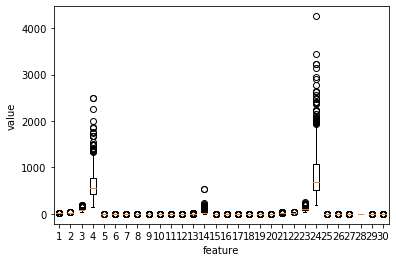

In [20]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [21]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [22]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [23]:
x = cancer.data
y = cancer.target

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
# stratify=y : 데이터를 나눌 때 비율을 동일하게 만듬, 비율이 불균형한 경우 y로 지정
# test_size=0.2 : 데이터 나누는 비율 조정(기본값은 75:25)
# random_state = 42 : 결과 일정하게 하기 위해 난수 초깃값 지정(실전에선 사용 X)

In [25]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [29]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        # 데이터의 특성이 많아 가중치를 초기화하지 않음
        self.losses = [] # 손실 함수의 결과값 저장할 리스트 생성
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0], 1)), x] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산, np.exp() 함수는 자연 상수의 지수 함수를 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # 가중치를 초기화, np.ones() 함수는 입력된 매개변수와 동일한 크기의 배열을 만들고 값을 1로 채움
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞음
            for i in indexes:
                z = self.forpass(x[i]) # 정방향 계산
                a = self.activation(z) # 활성화 함수
                err = -(y[i] - a) # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑, np.clip() 함수로 범위 지정
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 손실 누적
            self.losses.append(loss/len(y)) # 에포크마다 평균 손실 저장
            
    # 새로운 샘플에 대한 예측값을 계산해 주는 메소드
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 정방향 계산
        return np.array(z) > 0 # 계단함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [30]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\Users\ktkim\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


0.9298245614035088

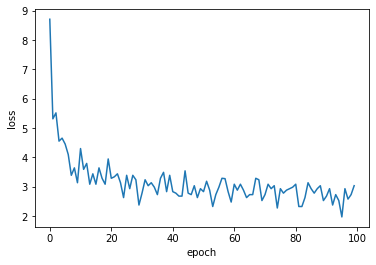

In [31]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()